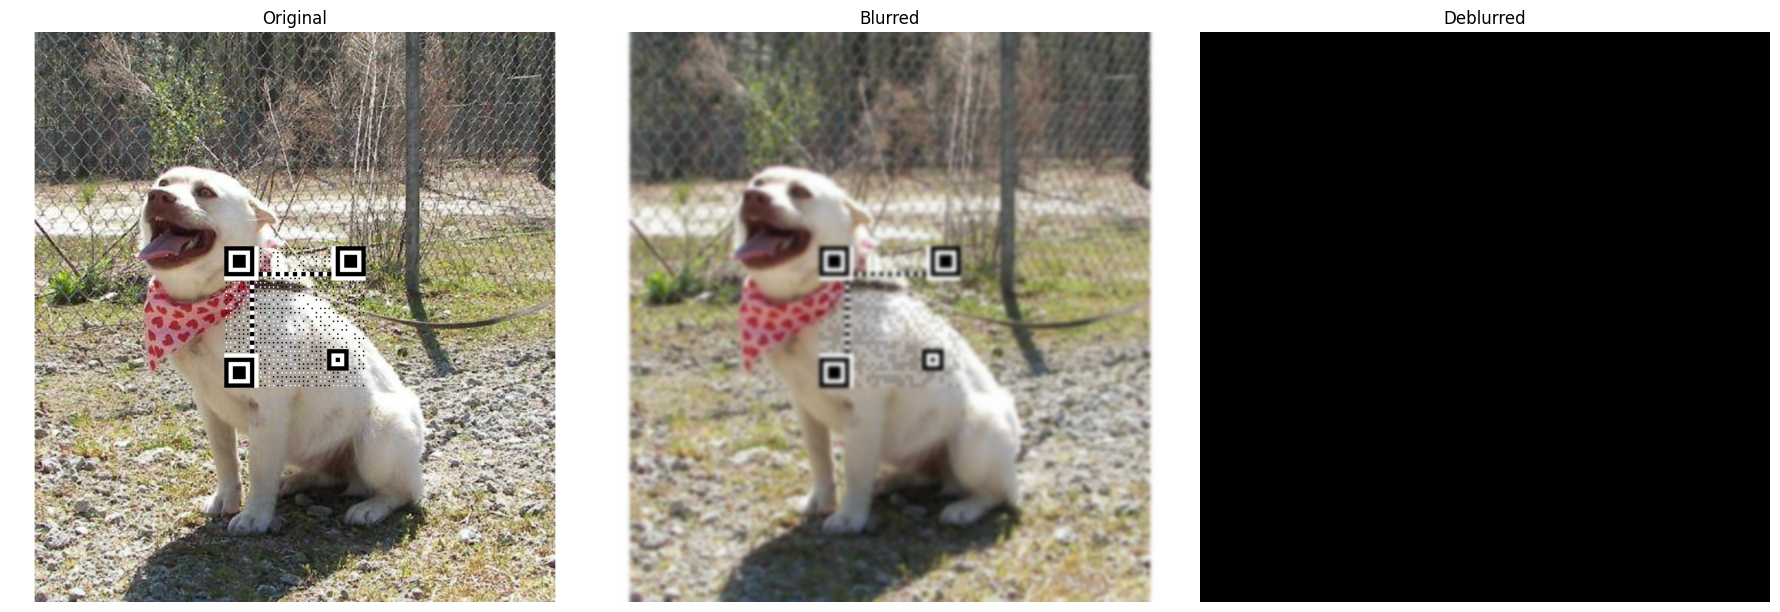

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import restoration
from scipy.ndimage import gaussian_filter

# Parameters
image_path = 'full.png'  # Path to the input image
blur_sigma = 5  # Standard deviation for Gaussian kernel

# Load the image in RGB mode
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

if img is None:
    raise FileNotFoundError(f"Image file '{image_path}' not found.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Function to add Gaussian blur
def blur_image(channel, sigma):
    return gaussian_filter(channel, sigma=sigma)

# Apply the blur to each channel
blurred_img = np.zeros_like(img, dtype=float)
for i in range(3):
    blurred_img[:, :, i] = blur_image(img[:, :, i], blur_sigma)

# Prepare the PSF (Gaussian kernel for Wiener filter)
psf = np.zeros_like(img[:, :, 0], dtype=float)  # Ensure PSF is float
psf[psf.shape[0] // 2, psf.shape[1] // 2] = 1
psf = gaussian_filter(psf, sigma=blur_sigma)

# Ensure PSF is normalized
psf /= psf.sum()

# Perform Wiener deconvolution on each channel
deblurred_img = np.zeros_like(img, dtype=float)
for i in range(3):
    deblurred_img[:, :, i] = restoration.wiener(blurred_img[:, :, i], psf, balance=0.1)

# Clip the deblurred image to valid range and convert to uint8
deblurred_img = np.clip(deblurred_img, 0, 255).astype(np.uint8)

# Display the results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True, sharey=True)

ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(blurred_img.astype(np.uint8))
ax[1].axis('off')
ax[1].set_title('Blurred')

ax[2].imshow(deblurred_img)
ax[2].axis('off')
ax[2].set_title('Deblurred')

fig.tight_layout()
plt.show()
